In [1]:
import csv
import math
import numpy

invariant_mass = []

with open('Zmumu_Run2011A.csv') as csvfile:
    
    reader = csv.DictReader(csvfile)
   
    for row in reader:
    
        M = float(row['M'])
        invariant_mass.append(M)

In [2]:
M_hist = numpy.histogram(invariant_mass, bins=60, range=(60,120))

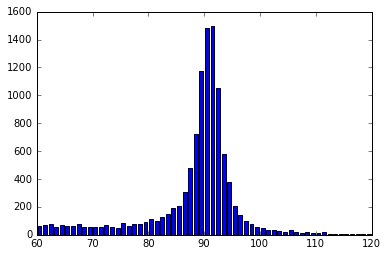

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

hist, bins = M_hist
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()


In [4]:
len(invariant_mass)

10851